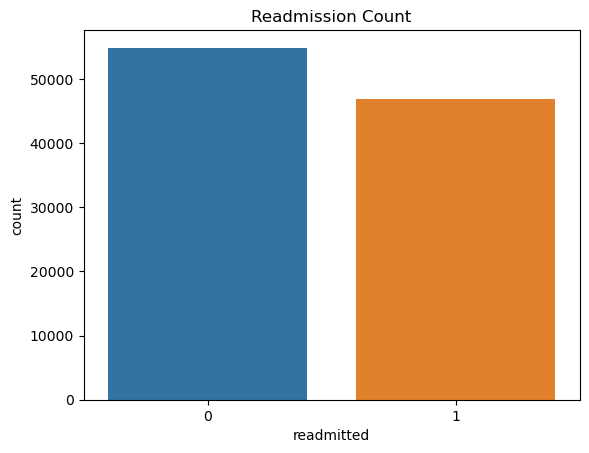

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766.000000
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,NaN
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,NaN
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460881
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498470
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Dhiyanesh Srinivasan/OneDrive/Desktop/hospital-readmission-analysis/data/diabetic_data.csv')
df.shape

df.head()

df['readmitted'].value_counts()

df['readmitted'].replace({'NO': 0, '<30': 1, '>30': 1}, inplace=True)

sns.countplot(x='readmitted', data=df)
plt.title('Readmission Count')
plt.show()

df.isnull().sum().sort_values(ascending=False).head(10)

df.describe(include='all')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = df.drop(['patient_nbr', 'encounter_id'], axis=1)

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.74      0.69     10952
           1       0.63      0.52      0.57      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354



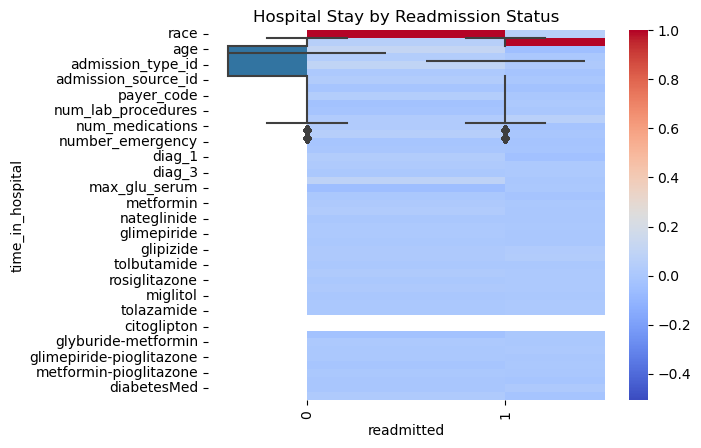

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('C:/Users/Dhiyanesh Srinivasan/OneDrive/Desktop/hospital-readmission-analysis/visuals/correlation_heatmap.png')

sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Hospital Stay by Readmission Status')
plt.savefig('C:/Users/Dhiyanesh Srinivasan/OneDrive/Desktop/hospital-readmission-analysis/visuals/hospital_stay_readmission.png')
